# PROJECT OVERVIEW   :
- Teclov has two minor constraints for investments:
   
    - It wants to invest between 5 to 15 million USD per round of investment
    - It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.
   
   
   
- Teclov wants to invest where most other investors are investing.Since this pattern is
  often observed among early stage startup investors.


- POINTS TO FOCUS ON :

    - Investment type analysis
    - Country analysis
    - Sector analysis

# Problem 1: Data Cleaning 1
- Load the companies and rounds data into two data frames and name them
companies and rounds2 respectively


In [11]:
# loading required dataframes
import pandas as pd
import numpy as np
rounds2=pd.read_csv("rounds2.csv",encoding="ansi")
companies3=pd.read_csv("companies.txt",sep="\t",encoding="ansi")# ansi
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [2]:
#how many Unique companies in rounds2 DF.

rounds2["company_name"]=rounds2["company_permalink"].str.lower().str.split("/").str[-1].str.replace("-"," ")
rounds2["company_permalink"]=rounds2["company_permalink"].str.lower()
x=rounds2["company_name"].nunique()

- There are 66368 unique companies in rounds2 DF.

In [3]:
#how many Unique companies in companies DF.

companies3["comp_name"]=companies3["permalink"].str.split("/").str[-1].str.replace("-"," ").str.lower()
companies3["permalink"]=companies3["permalink"].str.lower()
y=companies3["comp_name"].nunique()

- There are 66368 unique companies in companies DF.

In [4]:
#which column can be used as unique key for every company in companies DF.

x=companies3["homepage_url"]


- homepage_url or name can be used as unique key.

In [5]:
#Are there any companies in rounds2 DF which are not present in companies DF.

x=set(rounds2["company_name"])
y=set(companies3["comp_name"])
z=x.difference(y)
w=y.difference(x)

- NO, there are no such companies in rounds2 DF which are not present in companies DF.

In [6]:
# Merging companies and rounds2 DF and forming a DF master_frame
# no. of observations
master_frame2=pd.merge(rounds2,companies3,left_on="company_name",right_on="comp_name")
w=master_frame2.shape
master_frame2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,comp_name
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,the one of them inc,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,the one of them inc
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0 6 com,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0 6 com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,zzzzapp com,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,zzzzapp com
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,zzzzapp com,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,zzzzapp com
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,ãeron,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,ãeron
114947,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,ã”asys 2,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,ã”asys 2


- There are 114949 observations in the master_frame DF.

# Problem 2: Funding Type Analysis 
- To invest between 5 to 15 million USD per round of investment.

Text(0.5, 0, 'Funding type')

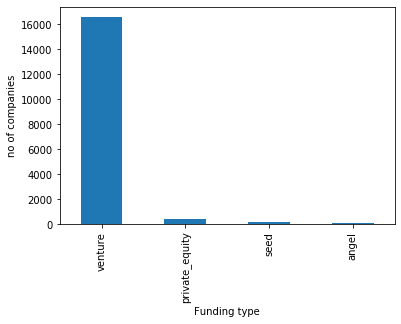

In [7]:
# calculating maximum no. of companies investing in a particular funding type.

import matplotlib.pyplot as plot
ls1=["venture","seed","angel","private_equity"]
x=master_frame2[(master_frame2["funding_round_type"].isin(ls1)) & (master_frame2["raised_amount_usd"]>=5000000)]
z=x[x["raised_amount_usd"]<=15000000]

# this shows the count of companies investing in a particular funding type.
a=z["funding_round_type"].value_counts()
%matplotlib inline
a.plot(kind="bar")
plot.ylabel("no of companies")
plot.xlabel("Funding type")

- The above bar graph clearly shows more than 16000 companies have invested on VENTURE funding type.

Text(0, 0.5, 'MRV Count')

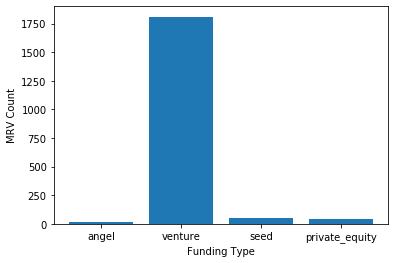

In [8]:
# most representative value MRV_count:

import numpy as np
j=z[z["funding_round_type"] == "angel"]["raised_amount_usd"].value_counts().max()
k=z[z["funding_round_type"] == "venture"]["raised_amount_usd"].value_counts().max()
l=z[z["funding_round_type"] == "seed"]["raised_amount_usd"].value_counts().max()
m=z[z["funding_round_type"] == "private_equity"]["raised_amount_usd"].value_counts().max()
MRV_df2=pd.DataFrame(['angel','venture','seed','private_equity'],[j,k,l,m])
MRV_df2.columns=['Count']
MRV_df2['funding_type'] = MRV_df2.index
from matplotlib import pyplot as plt
plt.bar(MRV_df2.Count,MRV_df2.funding_type)
plt.xlabel('Funding Type')
plt.ylabel('MRV Count')

- The above bar graph shows the most representative value of the investment amount is in venture.
- And according to the constraints of our company (Teclov) ,we should invest on venture type of investment.(5M to 15M USD)

# Problem 3: Country Analysis
- It wants to invest only in English-speaking countries because of the ease of
  communication with the companies.
- For your analysis, consider a country to be English speaking only if English is
  one of the official languages in that country.

In [9]:
# top 9 english speaking countries with max reprsentative of venture type investment

x=["ATG","BHS","BRB","BLZ","BWA","BDI","CMR","CAN","COK","DMA","SWZ","FSM","FJI","GHA","GRD","GUY","IND","IRL","JAM","KEN","KIR",'LSO','LBR','MWI','MLT','MHL','MUS','NAM','NRU','NGA','NIU','PAK','PLW','PNG','PHL','RWA','KNA','LCA','VCT','WSM',"SYC","SLE",'SGP','SLB','SOM','ZAF','SSD','SDN','TZA','GMB','TON','TTO',"TUV",'UGA','VUT','ZMB','ZWE','USA','GBR','NZL','AUS']
a=z[(z["country_code"].isin(x)) & (z["funding_round_type"]=="venture")].groupby("country_code")["raised_amount_usd"].sum().sort_values(ascending=False).head(9)
top9=pd.DataFrame(a)
top9.reset_index(inplace=True)
top9

,country_code,raised_amount_usd
0,USA,1.085313e+11
1,GBR,5.436844e+09
2,CAN,3.647010e+09
3,IND,2.976544e+09
4,SGP,6.461440e+08
5,IRL,5.177014e+08
6,AUS,5.169897e+08
7,NZL,1.126726e+08
8,NGA,7.600000e+07


| TOP ENGLISH SPEAKING COUNTRY | - USA |
| --- | - |
|SECOND MOST ENGLISH SPEAKING COUNTRY| - GBR |
|THIRD MOST ENGLISH SPEAKING COUNTRY| - CAN |

# Problem 4: Sector Analysis 1 
- Extract the primary sector of each category list from the category_list
column
- Use the mapping file 'mapping.csv' to map each primary sector to one of the
eight main sectors (Note that ‘Others’ is also considered one of the main 

In [10]:
#Extracting the primary sectors from the catagory list abnd making a seperate column in the master_frame1

master_frame2["primary_sector"]=master_frame2["category_list"].str.split("|").str[0]
master_frame2=pd.merge(master_frame2,cat_main,left_on=["primary_sector","category_list"],right_on=["category_list","category_list"])

NameError: name 'cat_main' is not defined

- Above is the master_frame with primary_sector as its new column.

In [ ]:
# Mapping subsectors to it main sector

mapping=pd.read_csv("C:\\Users\\debje\\Desktop\\Python\\datasets\\Teclov\\mapping.csv")
mapping=mapping.iloc[1:,:].drop("Blanks",axis=1)
mapping_melt=mapping.melt(id_vars="category_list", value_vars=[ 'Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])
a=pd.DataFrame(mapping_melt[mapping_melt["value"]==1].pivot_table(index=["category_list","variable"]))
cat_main=a.reset_index().drop("value",axis=1)  # its a dataframe

- The above DF (cat_main) contains the sub-sectors mapped to its main sector.

# Problem 5: Sector Analysis 2 

- Making three different dataframes with the above constraints will make no sense in this case as we have already found the funding type ie venture type.
                               

                                  | USA    | UK(GBR) | Canada |
------                                  
                               
1. Total number of investments(count) -    | 5949  |  337 | 250 |

2. Total amount of investment(USD) -    | 53272315512 | 2971451457 | 2142307794 | 

3. Top sector (based on count of investments) - | OTHERS | Cleantech / Semiconductors | Cleantech / Semiconductors |

4. Second-best sector (based on count of investments) - | Cleantech / Semiconductors | Others | Others|

5. Third-best sector (based on count of investments)  - | Health | News, Search and Messaging | News, Search and Messaging |

6. Number of investments in the top sector (refer to point 3) - | 2069 | 107 | 95 |

7. Number of investments in the second-best sector (refer to point 4) - | 1737 | 106 | 87 |

8. Number of investments in the third-best sector (refer to point 5) - | 601 | 31 | 19 |

9. For the top sector count-wise (point 3), which company received the highest investment? - | virtuestream | eusa pharma  | fresco microchip  | 
 |
10. For the second-best sector
count-wise (point 4), which company received the highest investment?     - | tigo energy | Sensage | quickplay media |
 

# USA DATA FRAME :

In [ ]:
usa = master_frame2[ master_frame2["country_code"]== "USA"]
usa = usa[usa["funding_round_type"] == "venture"]
usa = usa[(usa["raised_amount_usd"]>=5000000) & (usa["raised_amount_usd"]<=15000000) ]
usa1 = pd.DataFrame(usa.pivot_table(index= ["variable"],values= ["raised_amount_usd"],aggfunc=[np.sum]))
usa2 = pd.DataFrame(usa["variable"].value_counts())
usa1 = usa1.reset_index()
usa2 = usa2.sort_index()
usa1["count"] = usa2["variable"].values
usa1.rename({"variable":"main_sector"}, inplace= True,axis = 1)
usa1_merge = pd.merge(usa1,usa, left_on = "main_sector", right_on = "variable")
usa1["sum"]["raised_amount_usd"].sum()
usa1["count"].sum()
usa1

# GBR DATA FRAME :

In [ ]:
uk = master_frame2[ master_frame2["country_code"]== "GBR"]
uk = uk[uk["funding_round_type"] == "venture"]
uk = uk[(uk["raised_amount_usd"]>=5000000) & (uk["raised_amount_usd"]<=15000000) ]
uk1 = pd.DataFrame(uk.pivot_table(index= ["variable"],values= ["raised_amount_usd"],aggfunc=[np.sum]))
uk2 = pd.DataFrame(uk["variable"].value_counts())
uk1 = uk1.reset_index()
uk2 = uk2.sort_index()
uk1["count"] = uk2["variable"].values
uk1.rename({"variable":"main_sector"}, inplace= True,axis = 1)
uk1_merge = pd.merge(uk1,uk, left_on = "main_sector", right_on = "variable")
uk1
uk1["sum"]["raised_amount_usd"].sum()
uk1["count"].sum()
uk1
#uk1_merge[uk1_merge["variable"] == "Others"].pivot_table(index = "company_name", values = "variable", aggfunc = ["count"])["count"]["variable"].sort_values(ascending = False)

# CANADA DATA FRAME :

In [ ]:
can = master_frame2[ master_frame2["country_code"]== "CAN"]
can = can[can["funding_round_type"] == "venture"]
can = can[(can["raised_amount_usd"]>=5000000) & (can["raised_amount_usd"]<=15000000) ]
can1 = pd.DataFrame(can.pivot_table(index= ["variable"],values= ["raised_amount_usd"],aggfunc=[np.sum]))
can2 = pd.DataFrame(can["variable"].value_counts())
can1 = can1.reset_index()
can2 = can2.sort_index()
can1["count"] = can2["variable"].values
can1.rename({"variable":"main_sector"}, inplace= True,axis = 1)
can1
can1_merge = pd.merge(can1,can, left_on = "main_sector", right_on = "variable")
can1["sum"]["raised_amount_usd"].sum()
can1["count"].sum()
can1_merge[can1_merge["variable"] == "Others"].pivot_table(index = "company_name", values = "variable", aggfunc = ["count"])["count"]["variable"].sort_values(ascending = False)
can1

# Problem 6: Plots 

In [ ]:
# A plot showing the top 9 countries against the total amount of investments of
# funding type FT. This should make the top 3 countries (Country 1, Country 2,and Country 3) very clear.
x=["ATG","BHS","BRB","BLZ","BWA","BDI","CMR","CAN","COK","DMA","SWZ","FSM","FJI","GHA","GRD","GUY","IND","IRL","JAM","KEN","KIR",'LSO','LBR','MWI','MLT','MHL','MUS','NAM','NRU','NGA','NIU','PAK','PLW','PNG','PHL','RWA','KNA','LCA','VCT','WSM',"SYC","SLE",'SGP','SLB','SOM','ZAF','SSD','SDN','TZA','GMB','TON','TTO',"TUV",'UGA','VUT','ZMB','ZWE','USA','GBR','NZL','AUS']
a=z[(z["country_code"].isin(x)) & (z["funding_round_type"]=="venture")].groupby("country_code")["raised_amount_usd"].sum().sort_values(ascending=False).head(9)
%matplotlib inline
a.plot(kind="bar")
plot.ylabel("investment amount")

- The above graph shows the top 9 countries on the basis of total amount of investments of funding type FT (Venture).
- the top three countries are USA, GBR & CAN. 

# Plot of top3 countries & sectors

In [ ]:
x=["USA","GBR","CAN"]
top3_venture=master_frame2[(master_frame2["country_code"].isin(x)) & (master_frame2["funding_round_type"]=="venture")]
top3_venture_5m_15m=top3_venture[(top3_venture["raised_amount_usd"]>=5000000) & (top3_venture["raised_amount_usd"]<=15000000)]

yes=pd.DataFrame(top3_venture_5m_15m.pivot_table(index=["country_code","variable"],values="funding_round_type",aggfunc=np.size))
yes.reset_index(inplace=True)

In [ ]:
# df of can
variable_list_can=["Cleantech / Semiconductors","Others","News, Search and Messaging"]
can_sec_top3=pd.DataFrame(yes[(yes["variable"].isin(variable_list_can)) & (yes["country_code"]=="CAN")].sort_values(by="funding_round_type",ascending=False))
# df of gbrs
variable_list_gbr=["Cleantech / Semiconductors","Others","News, Search and Messaging"]
gbr_sec_top3=pd.DataFrame(yes[(yes["variable"].isin(variable_list_gbr)) & (yes["country_code"]=="GBR")].sort_values(by="funding_round_type",ascending=False))
# df of usa
variable_list_usa=["Cleantech / Semiconductors","Others","Health"]
usa_sec_top3=pd.DataFrame(yes[(yes["variable"].isin(variable_list_usa)) & (yes["country_code"]=="USA")].sort_values(by="funding_round_type",ascending=False))

In [ ]:
# dataframe containing top3 countries and top3 sectors
#plot1=pd.concat([usa_sec_top3,gbr_sec_top3])
#plot1=pd.concat([plot1,can_sec_top3])
#plot1.set_index("country_code",inplace=True)
#plot1.pivot_table(index=["country_code","variable"]).plot(kind="bar")
#plot.ylabel("no. of investments")
#plot.title("Top 3 Sectors & Countries")

In [ ]:
# plotting top 3 countries and sectors on the basis of total investmnts

import seaborn as sns
t3c=sns.barplot(data=plot5,x="country_code",y="funding_round_type",hue="variable")
t3c.set_title("Top 3 Sectors & Countries")

- The above gragh shows top 3 countries and sectors on the basis of no. of investments.

In [ ]:
# this proves that the top three countries are as above.

list2=["IND","GBR","CAN","USA"]
jaa=master_frame2[(master_frame2["country_code"].isin(list2)) & (master_frame2["funding_round_type"]=="venture")]
jaa=jaa[(jaa["raised_amount_usd"]>=5000000) & (jaa["raised_amount_usd"]<=15000000 )]
jaa.pivot_table(index="country_code",values="raised_amount_usd",aggfunc=np.sum).sort_values(by="raised_amount_usd",ascending=False)

# CONCLUSION:
1. According to the constraints of (5 to 15 million USD per round of investment):
    - The best funding type for teclov will be VENTURE
    
    
2. The top three english speaking countries on the focus for investment will be:
    - USA
    - GBR
    - CAN
    
    
3. The analysis of Top three SECTORS & COUNTRIES on the basis of total number of investments done with the help of a bar graph shown above.